In [104]:
import networkx as nx
import math
import random
import matplotlib.pyplot as plt
def construct_dag(l):
    g = nx.DiGraph()
    for e in l:
        for i in range(1,len(e)):
            if (e[i-1],e[i]) not in g.edges:
                g.add_edge(e[i-1],e[i])
    return g
def connected_gnp(n,p, max_tries = 10, directed = False):
    i = 0
    while i < max_tries:
        g = nx.fast_gnp_random_graph(N, p, directed=directed)
        if nx.is_connected(g):
            return g
        i += 1
    return None

def random_pairs_more_sh(g, V, max_tries = 10):
    i = 0
    while i < max_tries:
        pair = random.sample(V, k = 2)
        l = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=pair[0], target=pair[1])))
        if len(l) > 1:
            return l, pair
        i += 1
    return None


from math import prod
def prob_URW(dag, w):
    return prod( 1/dag.in_degree(w[i])  for i in range(1,len(w)))
def dist_URW(dag, l):
    return list(map( lambda x : prob_URW(dag, x), l ))

def random_weights(g,s,t):
    h = g.copy()
    n = len(g.nodes())
    for e in h.edges():
        h[e[0]][e[1]]['weight'] = 1 + random.uniform(-1/n,1/n)
    return nx.dijkstra_path(h, s, t, weight='weight')

def stat_random_weights(g,s,t,l, nb = 100):
    d = dict()
    for _ in range(nb):
        e = random_weights(g,s,t)
        te = tuple(e)
        if te in d:
            d[te] += 1
        else:
            d[te] = 1
    res = []
    for e in l:
        if e in d:
            res.append(d[e]/nb)
        else:
            res.append(0)
    return res
    

2
pair:  [11, 8]
[(11, 0, 8), (11, 4, 8), (11, 6, 8), (11, 7, 8), (11, 10, 8)]


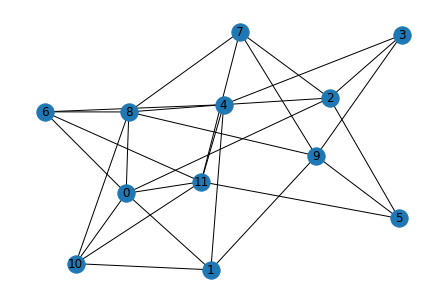

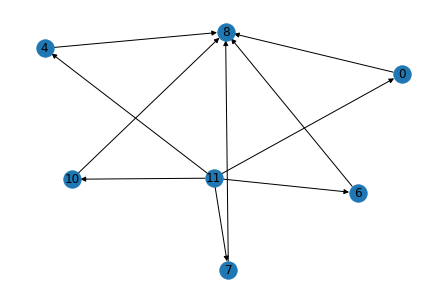

URW:  [0.2, 0.2, 0.2, 0.2, 0.2]
Rand Wei  [0.25, 0.22, 0.17, 0.17, 0.19]


In [94]:
N = 12
nb_pairs = 1
nb_graphs = 1
start = 2
for i in range(start,nb_graphs+start):
    print(i)
    p = (i*math.log(N))/N
    g = connected_gnp(N, p, directed=False)
    if g == None:
        continue
    V = list(g.nodes())
    for _ in range(nb_pairs):
        x = random_pairs_more_sh(g, V)
        if x == None:
            continue
        l, pair = x
        print("pair: ", pair)
        dag = construct_dag(l)
        nx.draw(g, with_labels = True)
        plt.show()
        nx.draw(dag, with_labels = True)
        plt.show()
        print("URW: ", dist_URW(dag, l))
        print("Rand Wei ", stat_random_weights(g,pair[0],pair[1],l))

In [108]:
from scipy.stats import wasserstein_distance

N = 120
nb_pairs = 10
nb_graphs = 2
start = 2
for i in range(start,nb_graphs+start):
    print(i)
    p = (i*math.log(N))/N
    g = connected_gnp(N, p, directed=False)
    if g == None:
        continue
    V = list(g.nodes())
    u1 = 0
    u2 = 0
    effective_pairs = 0
    for _ in range(nb_pairs):
        x = random_pairs_more_sh(g, V)
        if x == None:
            continue
        l, pair = x
        effective_pairs += 1
        #print("pair: ", pair)
        dag = construct_dag(l)
        #nx.draw(g, with_labels = True)
        #plt.show()
        #nx.draw(dag, with_labels = True)
        #plt.show()
        res_urw = dist_URW(dag, l)
        res_rand = stat_random_weights(g,pair[0],pair[1],l)
        res_unif = [ 1/len(l) for e in l ]
        
        u1 += wasserstein_distance(res_unif, res_urw)
        u2 += wasserstein_distance(res_unif, res_rand)
    print("wasser URW average : ", u1/effective_pairs)
    print("wasser Rand Wei average : ", u2/effective_pairs)
#         print("URW: ", res_urw, "Wasser", u1)
#         print("Rand Wei ", res_rand, "Wasser", u2)

2
wasser URW average :  0.03035614324625313
wasser Rand Wei average :  0.03478712581679615
3
wasser URW average :  0.001111111111111111
wasser Rand Wei average :  0.030000000000000016
